In [1]:
import datetime as dt
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import  train_test_split
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None

C:\Users\TP040804\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pwd

'C:\\Users\\TP040804\\FYP_Final'

In [5]:
import os
os.chdir ('D:\Semester 2 (Final)\FYP (Final)\Dataset\Rossman')

In [6]:
training_df = pd.read_csv("train.csv")
store_df = pd.read_csv("store.csv")
test_df = pd.read_csv("test.csv")

C:\Users\TP040804\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
def is_nan(val):
    return val != val

def less_than_ten(val):
    if int(val) < 10:
        return "0" + val
    else:
        return val

# 1.0 Train Dataset

### 1.1 Missing Value

In [8]:
training_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### 1.2 Outlier Detection

[]

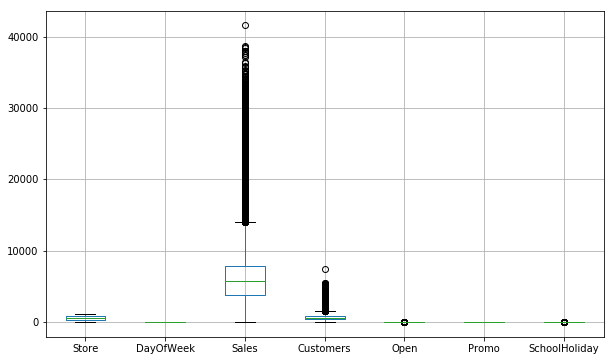

In [9]:
training_df.boxplot(return_type='dict', figsize=(10,6))
plt.plot()

In [10]:
training_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [11]:
Dataframe = training_df[(training_df['Sales'] > 15000)]
Dataframe.head(30)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
6,7,5,31/7/2015,15344,1414,1,1,0,1
124,125,5,31/7/2015,18227,2041,1,1,0,1
191,192,5,31/7/2015,16191,1027,1,1,0,0
210,211,5,31/7/2015,17286,1659,1,1,0,1
250,251,5,31/7/2015,22205,2508,1,1,0,1
261,262,5,31/7/2015,25774,3669,1,1,0,1
319,320,5,31/7/2015,19898,2316,1,1,0,1
334,335,5,31/7/2015,17867,2592,1,1,0,1
335,336,5,31/7/2015,16459,2049,1,1,0,1
367,368,5,31/7/2015,16556,1025,1,1,0,1


In [12]:
Dataframe.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,19731.000000,19731.000000,19731.000000,19731.000000,19731.0,19731.000000,19731.000000
mean,576.480412,2.865896,18170.432112,2129.900917,1.0,0.706604,0.223354
std,278.329697,1.844777,3046.625209,763.607549,0.0,0.455330,0.416504
min,3.000000,1.000000,15001.000000,261.000000,1.0,0.000000,0.000000
25%,336.000000,1.000000,15956.000000,1549.000000,1.0,0.000000,0.000000
50%,560.000000,2.000000,17273.000000,1989.000000,1.0,1.000000,0.000000
75%,788.000000,4.000000,19434.000000,2580.000000,1.0,1.000000,0.000000
max,1114.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000


# 2.0 Store Dataset

### 2.1 Missing Value

In [13]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


#### Competition distance is one of the feature which is related to CompetitionOpenSinceMonth and CompetitionOpenSinceYear due to if there is no competitor store open near Rossman store on a certain month or year then there will be no competition distance for that specific store based on that the null value of Competition distance is set to 0 if the value for CompetitionOpenSinceMonth and CompetitionOpenSinceYear is NaN or 0. 

In [15]:
# Fill NaN values in store_df for "CompetitionDistance" = 0 
store_df["CompetitionDistance"][is_nan(store_df["CompetitionDistance"])] = 0

#### There are 354 missing values for CompetitionOpenSinceMonth and CompetitionOpenSinceYear which cannot be deleted due to Promo 2 is applicable during that time as well as the Competition distance value is not zero that is why the null values are filling with their mean value. 

In [16]:
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna((store_df['CompetitionOpenSinceMonth'].mean()))

In [17]:
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna((store_df['CompetitionOpenSinceYear'].mean()))

#### There are 544 missing value for Promo2SinceWeek, Promo2SinceYear and PromoInterval. These three features are related to Promo2 due to this the missing value is represent when the Promo2 is 0 that is why it is filling with 0 value. 

In [18]:
print(store_df[store_df['Promo2SinceWeek'].isnull()])

      Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
5         6         a          a                310.0   
6         7         a          c              24000.0   
7         8         a          a               7520.0   
8         9         a          c               2030.0   
9        10         a          a               3160.0   
15       16         a          c               3270.0   
22       23         d          a               4060.0   
24       25         c          a                430.0   
25       26         d          a               2300.0   
28       29         d          c               2170.0   
30       31         d          c               9800.0   
32       33         a          c               1320.0   
33       34         c          a               2240.0   
36       37         c          

In [19]:
store_df.loc[store_df['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = 0

[]

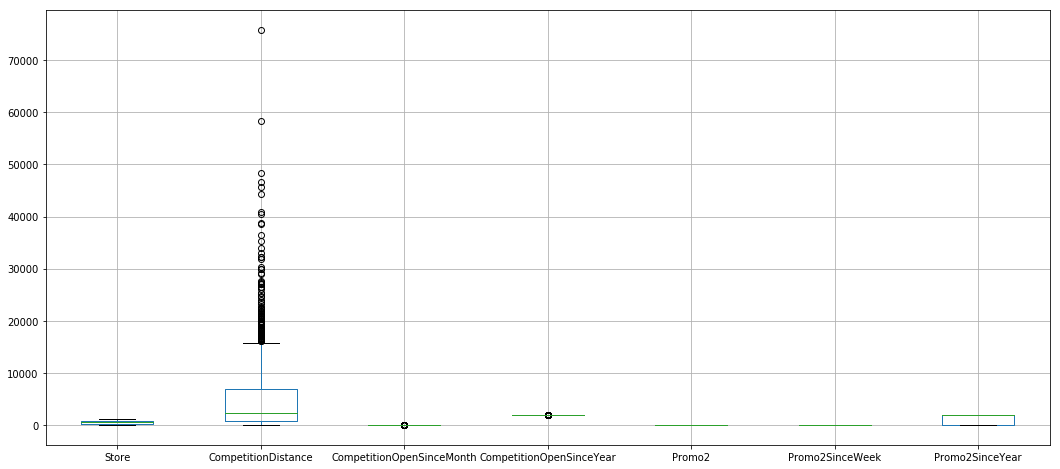

In [20]:
store_df.boxplot(return_type='dict', figsize=(18,8))
plt.plot()

# 3.0 Test Dataset

In [21]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [22]:
test_df[test_df['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


#### There are 11 missing value for Open feature. Based on the research it shows that most of the shop is closed on Sunday due to this, the missing value is replacing with 1 if the DayofWeek is not Sunday. 

In [23]:
test_df["Open"][is_nan(test_df["Open"])] = (test_df["DayOfWeek"] != 7).astype(int)

# 4.0 Data Integration

### 4.1 Merging train and test dataset

In [24]:
train_store = pd.merge(training_df, store_df, how = 'left', on='Store')

In [25]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/7/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,31/7/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31/7/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31/7/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,31/7/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [26]:
test_store = pd.merge(test_df, store_df, how = 'left', on='Store')

In [27]:
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0


# 5.0 Univarite Analysis

### 5.1 Categorical Variables

##### stateholiday have two 0, one is string and integer

In [28]:
train_store.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

##### 5.1.1 Converting to string for univarite analysis

In [29]:
train_store.StateHoliday = train_store.StateHoliday.astype(str)

In [30]:
train_store.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

##### 5.1.2 Label encoding 

In [31]:
train_store.loc[train_store['StateHoliday'] == '0', 'StateHoliday'] = 0
train_store.loc[train_store['StateHoliday'] == 'a', 'StateHoliday'] = 1
train_store.loc[train_store['StateHoliday'] == 'b', 'StateHoliday'] = 2
train_store.loc[train_store['StateHoliday'] == 'c', 'StateHoliday'] = 3
train_store['StateHoliday'] = train_store['StateHoliday'].astype(int, copy=False)

In [32]:
print('levels :', train_store['StateHoliday'].unique(), '; data type :', train_store['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int32


In [33]:
test_store.StateHoliday.unique()

array(['0', 'a'], dtype=object)

In [34]:
test_store.StateHoliday = test_store.StateHoliday.astype(str)

In [35]:
test_store.loc[test_store['StateHoliday'] == '0', 'StateHoliday'] = 0
test_store.loc[test_store['StateHoliday'] == 'a', 'StateHoliday'] = 1
test_store['StateHoliday'] = test_store['StateHoliday'].astype(int, copy=False)

In [36]:
print('levels :', train_store['StateHoliday'].unique(), '; data type :', train_store['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int32


##### 5.1.3 Frequency Table

In [37]:
def foo(train_store, columns):
    return train_store[columns].apply(pd.value_counts, axis=0)

print(foo(train_store,['Open','SchoolHoliday']))

     Open  SchoolHoliday
0  172817         835488
1  844392         181721


### 5.2 Numeric Analysis

In [38]:
# Remove all Closed Stores ("Sales" = 0)
train_store = train_store[train_store["Open"] != 0]

#### 5.2.1 Numerical Central Tendancy

##### 5.2.1.1 Sales

In [39]:
train_store['Sales'].describe()

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [40]:
train_store['Sales'].median()

6369.0

In [41]:
train_store['Sales'].mode()

0    5674
dtype: int64

In [42]:
train_store['Sales'].skew()

1.5939220392699809

##### 5.2.1.2 Customers

In [43]:
train_store['Customers'].describe()

count    844392.000000
mean        762.728395
std         401.227674
min           0.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

In [44]:
train_store['Customers'].mode()

0    560
dtype: int64

In [45]:
train_store['Customers'].skew()

2.7881104232962177

##### 5.2.1.3 CompetionDistance

In [46]:
train_store['CompetitionDistance'].describe()

count    844392.000000
mean       5443.849764
std        7804.251737
min           0.000000
25%         700.000000
50%        2320.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [47]:
train_store['CompetitionDistance'].mode()

0    250.0
dtype: float64

In [48]:
train_store['CompetitionDistance'].skew()

2.977873570129918

##### 5.2.1.4 CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear

In [49]:
train_store['CompetitionOpenSinceMonth'].describe()

count    844392.000000
mean          7.224823
std           2.650806
min           1.000000
25%           6.000000
50%           7.224704
75%           9.000000
max          12.000000
Name: CompetitionOpenSinceMonth, dtype: float64

In [50]:
train_store['CompetitionOpenSinceMonth'].mode()

0    7.224704
dtype: float64

In [51]:
train_store['CompetitionOpenSinceMonth'].skew()

-0.20771728384760033

In [52]:
train_store['CompetitionOpenSinceYear'].describe()

count    844392.000000
mean       2008.688557
std           4.936447
min        1900.000000
25%        2008.000000
50%        2008.668857
75%        2011.000000
max        2015.000000
Name: CompetitionOpenSinceYear, dtype: float64

In [53]:
train_store['CompetitionOpenSinceYear'].mode()

0    2008.668857
dtype: float64

In [54]:
train_store['CompetitionOpenSinceYear'].skew()

-9.103622732717744

In [55]:
train_store['Promo2SinceWeek'].describe()

count    844392.000000
mean         11.596118
std          15.307873
min           0.000000
25%           0.000000
50%           0.000000
75%          22.000000
max          50.000000
Name: Promo2SinceWeek, dtype: float64

In [56]:
train_store['Promo2SinceWeek'].mode()

0    0.0
dtype: float64

In [57]:
train_store['Promo2SinceWeek'].skew()

1.0104419411247823

In [58]:
train_store['Promo2SinceYear'].describe()

count    844392.000000
mean       1003.230065
std        1005.874806
min           0.000000
25%           0.000000
50%           0.000000
75%        2012.000000
max        2015.000000
Name: Promo2SinceYear, dtype: float64

In [59]:
train_store['Promo2SinceYear'].mode()

0    0.0
dtype: float64

In [60]:
train_store['Promo2SinceYear'].skew()

0.005267064979087477

In [ ]:
train_store.to_csv("Data_preprocessing/PreprocessingData.csv", sep=',', index=False)

In [57]:
test_store.to_csv("Data_preprocessing/PreprocessingTestData.csv", sep=',', index=False)